In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [60]:
df = pd.read_csv("/content/drive/My Drive/vqa/Compasbias/Combine/combinedataF1.csv")
df = df.drop(columns=['Unnamed: 0'])

In [61]:
# Calculate class distribution
class_distribution = df['is_recid'].value_counts(normalize=True)
print("Class Distribution (%):\n", class_distribution)


Class Distribution (%):
 is_recid
0    0.518852
1    0.481148
Name: proportion, dtype: float64


In [62]:
df.head()

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,is_recid,Female-African-American,Female-Asian,Female-Caucasian,Female-Hispanic,Female-Native-American,Female-Other,Male-African-American,Male-Asian,Male-Caucasian,Male-Hispanic,Male-Native-American,Male-Other
0,69,1,0,0.0,1.0,0,0,False,False,False,False,False,False,False,False,False,False,False,True
1,34,3,0,10.0,1.0,1,1,False,False,False,False,False,False,True,False,False,False,False,False
2,24,4,4,1.0,1.0,0,1,False,False,False,False,False,False,True,False,False,False,False,False
3,23,8,1,0.0,1.0,0,0,False,False,False,False,False,False,True,False,False,False,False,False
4,43,1,2,0.0,76.0,0,0,False,False,False,False,False,False,False,False,False,False,False,True


In [63]:
filtered_df=df

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
filtered_df['Female-African-Americanale'] = label_encoder.fit_transform(filtered_df['Female-African-American'])
filtered_df['Male-African-American'] = label_encoder.fit_transform(filtered_df['Male-African-American'])
filtered_df['Female-Caucasian'] = label_encoder.fit_transform(filtered_df['Female-Caucasian'])
filtered_df['Female-Asian'] = label_encoder.fit_transform(filtered_df['Female-Asian'])
filtered_df['Female-Native-American'] = label_encoder.fit_transform(filtered_df['Female-Native-American'])
filtered_df['Female-Other'] = label_encoder.fit_transform(filtered_df['Female-Other'])


filtered_df['Male-Caucasian'] = label_encoder.fit_transform(filtered_df['Male-Caucasian'])
filtered_df['Female-Hispanic'] = label_encoder.fit_transform(filtered_df['Female-Hispanic'])
filtered_df['Male-Hispanic'] = label_encoder.fit_transform(filtered_df['Male-Hispanic'])
filtered_df['Male-Asian'] = label_encoder.fit_transform(filtered_df['Male-Asian'])
filtered_df['Male-Native-American'] = label_encoder.fit_transform(filtered_df['Male-Native-American'])
filtered_df['Male-Other'] = label_encoder.fit_transform(filtered_df['Male-Other'])


In [65]:
# Correct way to drop the target column
X = df.drop(columns=['is_recid'])
Y = df['is_recid']


In [66]:
from sklearn.model_selection import train_test_split

# Split the data into train and temporary (test + validation)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.20, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.50, random_state=42)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)
print("Test set shape:", X_test.shape, Y_test.shape)


Training set shape: (5771, 19) (5771,)
Validation set shape: (721, 19) (721,)
Test set shape: (722, 19) (722,)


# Simple DL

In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


In [69]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))  # Corrected line: Add Dropout layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history=model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Epoch 1/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - acc: 0.5636 - loss: 2.4834 - val_acc: 0.6921 - val_loss: 0.6327
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6534 - loss: 0.7337 - val_acc: 0.7032 - val_loss: 0.5793
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6683 - loss: 0.6348 - val_acc: 0.7157 - val_loss: 0.5774
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6751 - loss: 0.6151 - val_acc: 0.7129 - val_loss: 0.5640
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6880 - loss: 0.6114 - val_acc: 0.7157 - val_loss: 0.5718
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6998 - loss: 0.5908 - val_acc: 0.7448 - val_loss: 0.5485
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7030 - loss: 0.5792 - val_acc: 0.7503 - val_loss: 0.5303
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7130 - loss: 0.5712 - val_acc: 0.7476 - val_loss: 0.5229
Epoch 9/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

In [70]:
from sklearn.metrics import accuracy_score

train_predictions = (model.predict(X_train) > 0.5).astype("int32")
test_predictions = (model.predict(X_test) > 0.5).astype("int32")

train_score = accuracy_score(Y_train, train_predictions) * 100
test_score = accuracy_score(Y_test, test_predictions) * 100

print(f"Train accuracy: {train_score:.2f}%")
print(f"Test accuracy: {test_score:.2f}%")


181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train accuracy: 72.50%
Test accuracy: 72.02%


In [71]:
from sklearn.metrics import accuracy_score ,auc
from sklearn.metrics import roc_curve, auc

def calculateAUC(model, X_test, Y_test):
    y_proba = model.predict(X_test)
    # If Y_test is one-hot encoded, take the column corresponding to the positive class
    if y_proba.shape[1] > 1:
        y_proba = y_proba[:, 1]

    fpr, tpr, thresholds = roc_curve(Y_test, y_proba)  # Calculate FPR and TPR
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    print(f"AUC: {roc_auc:.4f}")  # Print the AUC value

    return roc_auc

calculateAUC(model,X_test, Y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
AUC: 0.7731


0.7730739215428717

181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


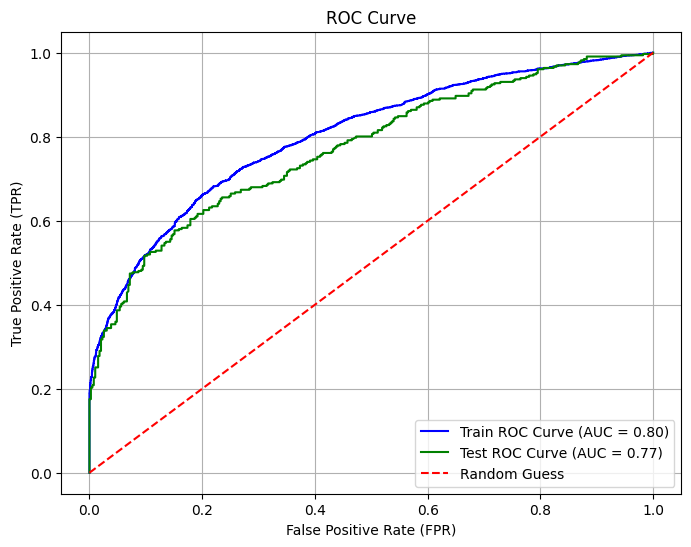

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_train_prob = model.predict(X_train)
y_pred_test_prob = model.predict(X_test)

fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, y_pred_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, y_pred_test_prob)

auc_train = roc_auc_score(Y_train, y_pred_train_prob)
auc_test = roc_auc_score(Y_test, y_pred_test_prob)

# Plot ROC curves for both train and test
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f"Train ROC Curve (AUC = {auc_train:.2f})")
plt.plot(fpr_test, tpr_test, color='green', label=f"Test ROC Curve (AUC = {auc_test:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


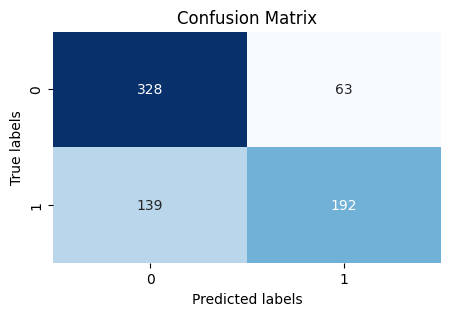

In [73]:
conf_matrix1 = confusion_matrix(Y_test, test_predictions)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

### Shap

In [74]:
import shap

shap.initjs()

In [76]:
# Convert DataFrames to numpy arrays
X_train_scaled_np = X_train.to_numpy().astype(np.float32)
X_test_scaled_np = X_test.to_numpy().astype(np.float32)


explainer = shap.DeepExplainer(model, X_train_scaled_np)

shap_values = explainer.shap_values(X_test_scaled_np)

# Check the type and shape of SHAP values
print("SHAP values type:", type(shap_values))  # Should be a list or tuple
print("Number of SHAP value arrays:", len(shap_values))  # For binary classification, it should be 2
print("Shape of SHAP values array:", np.array(shap_values).shape)  # Check the shape


SHAP values type: <class 'numpy.ndarray'>
Number of SHAP value arrays: 722
Shape of SHAP values array: (722, 19, 1)


## For first index

In [77]:
X_test[:1]

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,Female-African-American,Female-Asian,Female-Caucasian,Female-Hispanic,Female-Native-American,Female-Other,Male-African-American,Male-Asian,Male-Caucasian,Male-Hispanic,Male-Native-American,Male-Other,Female-African-Americanale
1662,19,6,0,2.0,1.0,1,False,0,0,0,0,0,0,0,1,0,0,0,0


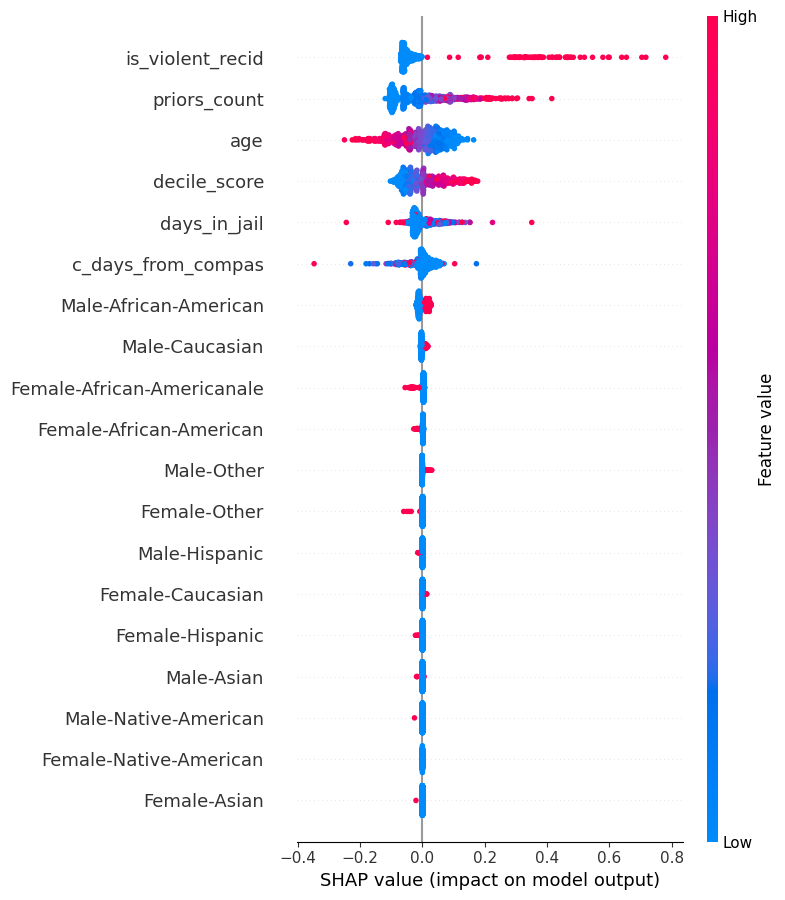

In [78]:
feature_names = ['age', 'decile_score', 'priors_count', 'days_in_jail',
       'c_days_from_compas', 'is_violent_recid', 'Female-African-American',
       'Female-Asian', 'Female-Caucasian', 'Female-Hispanic',
       'Female-Native-American', 'Female-Other', 'Male-African-American',
       'Male-Asian', 'Male-Caucasian', 'Male-Hispanic', 'Male-Native-American',
       'Male-Other', 'Female-African-Americanale']
shap.summary_plot(shap_values[:, :, 0], X_test_scaled_np, feature_names=feature_names)


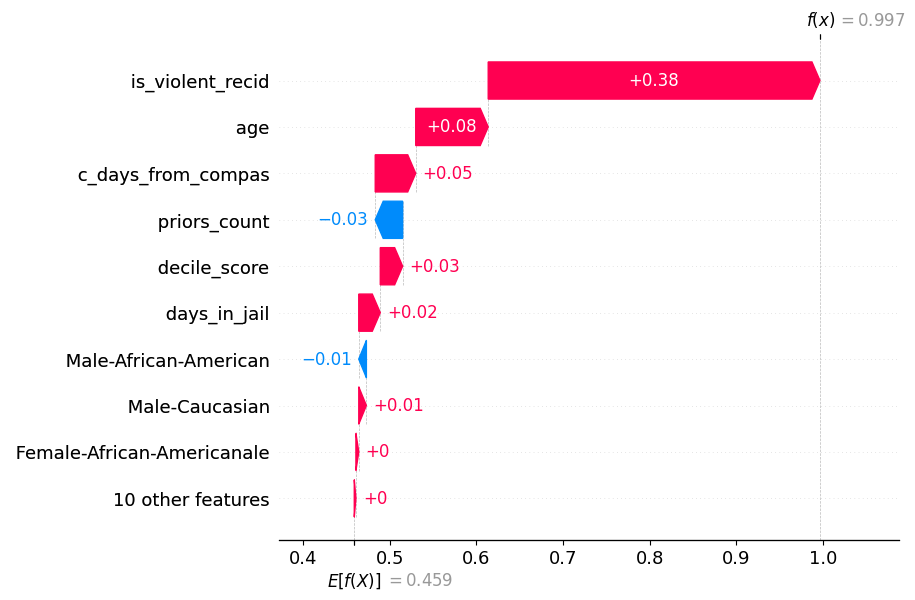

In [79]:
# Select a single instance (the first row of x_test)
sample_index = 0

shap_values_instance = shap_values[sample_index, :, 0]
expected_value = explainer.expected_value[0].numpy()
features_instance = X_test_scaled_np[sample_index]
feature_names = ['age', 'decile_score', 'priors_count', 'days_in_jail',
       'c_days_from_compas', 'is_violent_recid', 'Female-African-American',
       'Female-Asian', 'Female-Caucasian', 'Female-Hispanic',
       'Female-Native-American', 'Female-Other', 'Male-African-American',
       'Male-Asian', 'Male-Caucasian', 'Male-Hispanic', 'Male-Native-American',
       'Male-Other', 'Female-African-Americanale']
shap.plots._waterfall.waterfall_legacy(
    expected_value=expected_value,
    shap_values=shap_values_instance,
    features=features_instance,
    feature_names=feature_names
)


In [80]:
import pandas as pd

shap_scores_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Value': shap_values_instance,
    'Feature Value': features_instance
})

shap_scores_df = shap_scores_df.sort_values(by='SHAP Value', ascending=False)

# Display the sorted table
print(shap_scores_df)


                       Feature  SHAP Value  Feature Value
5             is_violent_recid    0.382932            1.0
0                          age    0.083681           19.0
4           c_days_from_compas    0.046739            1.0
1                 decile_score    0.025816            6.0
3                 days_in_jail    0.024851            2.0
14              Male-Caucasian    0.008757            1.0
18  Female-African-Americanale    0.003313            0.0
6      Female-African-American    0.001595            0.0
11                Female-Other    0.000576            0.0
15               Male-Hispanic    0.000480            0.0
9              Female-Hispanic    0.000325            0.0
16        Male-Native-American    0.000028            0.0
13                  Male-Asian    0.000005            0.0
7                 Female-Asian    0.000003            0.0
10      Female-Native-American   -0.000025            0.0
8             Female-Caucasian   -0.000111            0.0
17            

In [81]:
import pandas as pd

# Extract SHAP values for class 0
shap_values_class_0 = shap_values[:, :, 0]  # For the first class=0

# Convert SHAP values for class 0 to a pandas DataFrame
shap_table = pd.DataFrame(
    shap_values_class_0,
    columns=X_test.columns,  # Use feature names from X_test
    index=X_test.index       # Use the index from X_test
)

# Convert base value to a Python float
base_value = float(explainer.expected_value[0])  # Adjust index if needed for multi-class

# Add the base value column
shap_table['Base Value'] = base_value

# Compute the SHAP prediction (optional)
shap_table['SHAP Prediction'] = shap_table.sum(axis=1) + base_value




In [82]:
shap_table.head()

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,Female-African-American,Female-Asian,Female-Caucasian,Female-Hispanic,Female-Native-American,Female-Other,Male-African-American,Male-Asian,Male-Caucasian,Male-Hispanic,Male-Native-American,Male-Other,Female-African-Americanale,Base Value,SHAP Prediction
1662,0.083681,0.025816,-0.031642,0.024851,0.046739,0.382932,0.001595,2.809308e-06,-0.000111,0.000325,-0.000025,0.000576,-0.008805,0.000005,0.008757,0.000480,0.000028,-0.000983,0.003313,0.45897,1.455475
6811,0.079696,0.073048,-0.038304,0.061598,0.008108,-0.046110,0.002091,3.751994e-06,-0.000422,0.000279,-0.000051,0.000598,-0.013080,0.000043,0.013424,0.000578,0.000041,-0.001087,0.003900,0.45897,1.062291
549,-0.033276,-0.011792,-0.010955,-0.029918,-0.031770,-0.005018,0.000132,6.289714e-07,0.000160,-0.001973,-0.000004,0.000072,-0.001654,0.000013,-0.000871,0.000093,0.000002,0.000025,0.000425,0.45897,0.791630
1373,-0.107426,-0.069986,-0.047571,0.038117,-0.053021,-0.050497,0.001368,1.975412e-06,-0.000021,0.000165,-0.000031,0.000302,-0.008192,0.000063,-0.002498,-0.004885,0.000022,-0.000445,0.002415,0.45897,0.615823
6060,0.075620,-0.046668,-0.057160,-0.022824,0.006288,-0.066826,0.002223,4.005870e-06,0.000194,0.000319,-0.000059,0.000561,0.018456,0.000099,-0.004159,0.000206,0.000039,-0.000961,0.004060,0.45897,0.827351




---



---



---



### Lime

In [ ]:
! pip install lime

In [83]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np


XAI for only instance from xtest


---



In [84]:
# Define a prediction function that returns probabilities for both classes
def predict_fn(X):
    X = np.array(X)
    # Get the probability for class 1
    prob_class_1 = model.predict(X)
    # Probability for class 0 is the complement of class 1
    prob_class_0 = 1 - prob_class_1
    # Return both probabilities (class 0 and class 1)
    return np.hstack((prob_class_0, prob_class_1))

explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=[0, 1],
    mode='classification'
)

# Select a sample to explain (e.g., the first instance in the test set)
sample_index = 1
sample = X_test.iloc[sample_index].values

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(
    data_row=sample,                # The instance to explain
    predict_fn=predict_fn           # The updated prediction function
)

explanation.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [85]:
lime_values = explanation.as_list()
lime_table = lime_table.sort_values(by='Contribution', ascending=False)

# Display the sorted table
print(lime_table)

                           Feature  Contribution
1                     age <= 25.00      0.087581
2              days_in_jail > 8.00      0.070674
4       c_days_from_compas <= 1.00      0.047854
5             Female-Other <= 0.00      0.042275
6     Male-Native-American <= 0.00      0.036143
8  Female-African-American <= 0.00      0.030052
9      4.00 < decile_score <= 7.00      0.024341
7               Male-Other <= 0.00     -0.030411
3      0.00 < priors_count <= 2.00     -0.055298
0         is_violent_recid <= 0.00     -0.392109




---



---



---



### 3.Permutation Feature Importance





In [86]:
from sklearn.inspection import permutation_importance


XAI for all Xtest data

In [87]:
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# Define a custom scoring function
def keras_scoring_function(model, X, y):
    y_pred = model.predict(X)
    # Convert probabilities to class labels (0 or 1) by applying a threshold of 0.5
    y_pred_class = (y_pred > 0.5).astype(int)
    # Return the accuracy score
    return accuracy_score(y, y_pred_class)

# Use permutation importance with the custom scoring function
result = permutation_importance(
    model, X_test, Y_test,
    n_repeats=10, random_state=42,
    scoring=keras_scoring_function
)

# Create a DataFrame to display the results with feature names
importance_df = pd.DataFrame({
    'Feature': X_test.columns,  # Feature names
    'Importance': result.importances_mean  # Mean permutation importance
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the table
print(importance_df)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23



---



---



---



### 4. Accumulated Local Effects (ALE)

---



In [ ]:
! pip install alibi

XAI for all xtest data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2

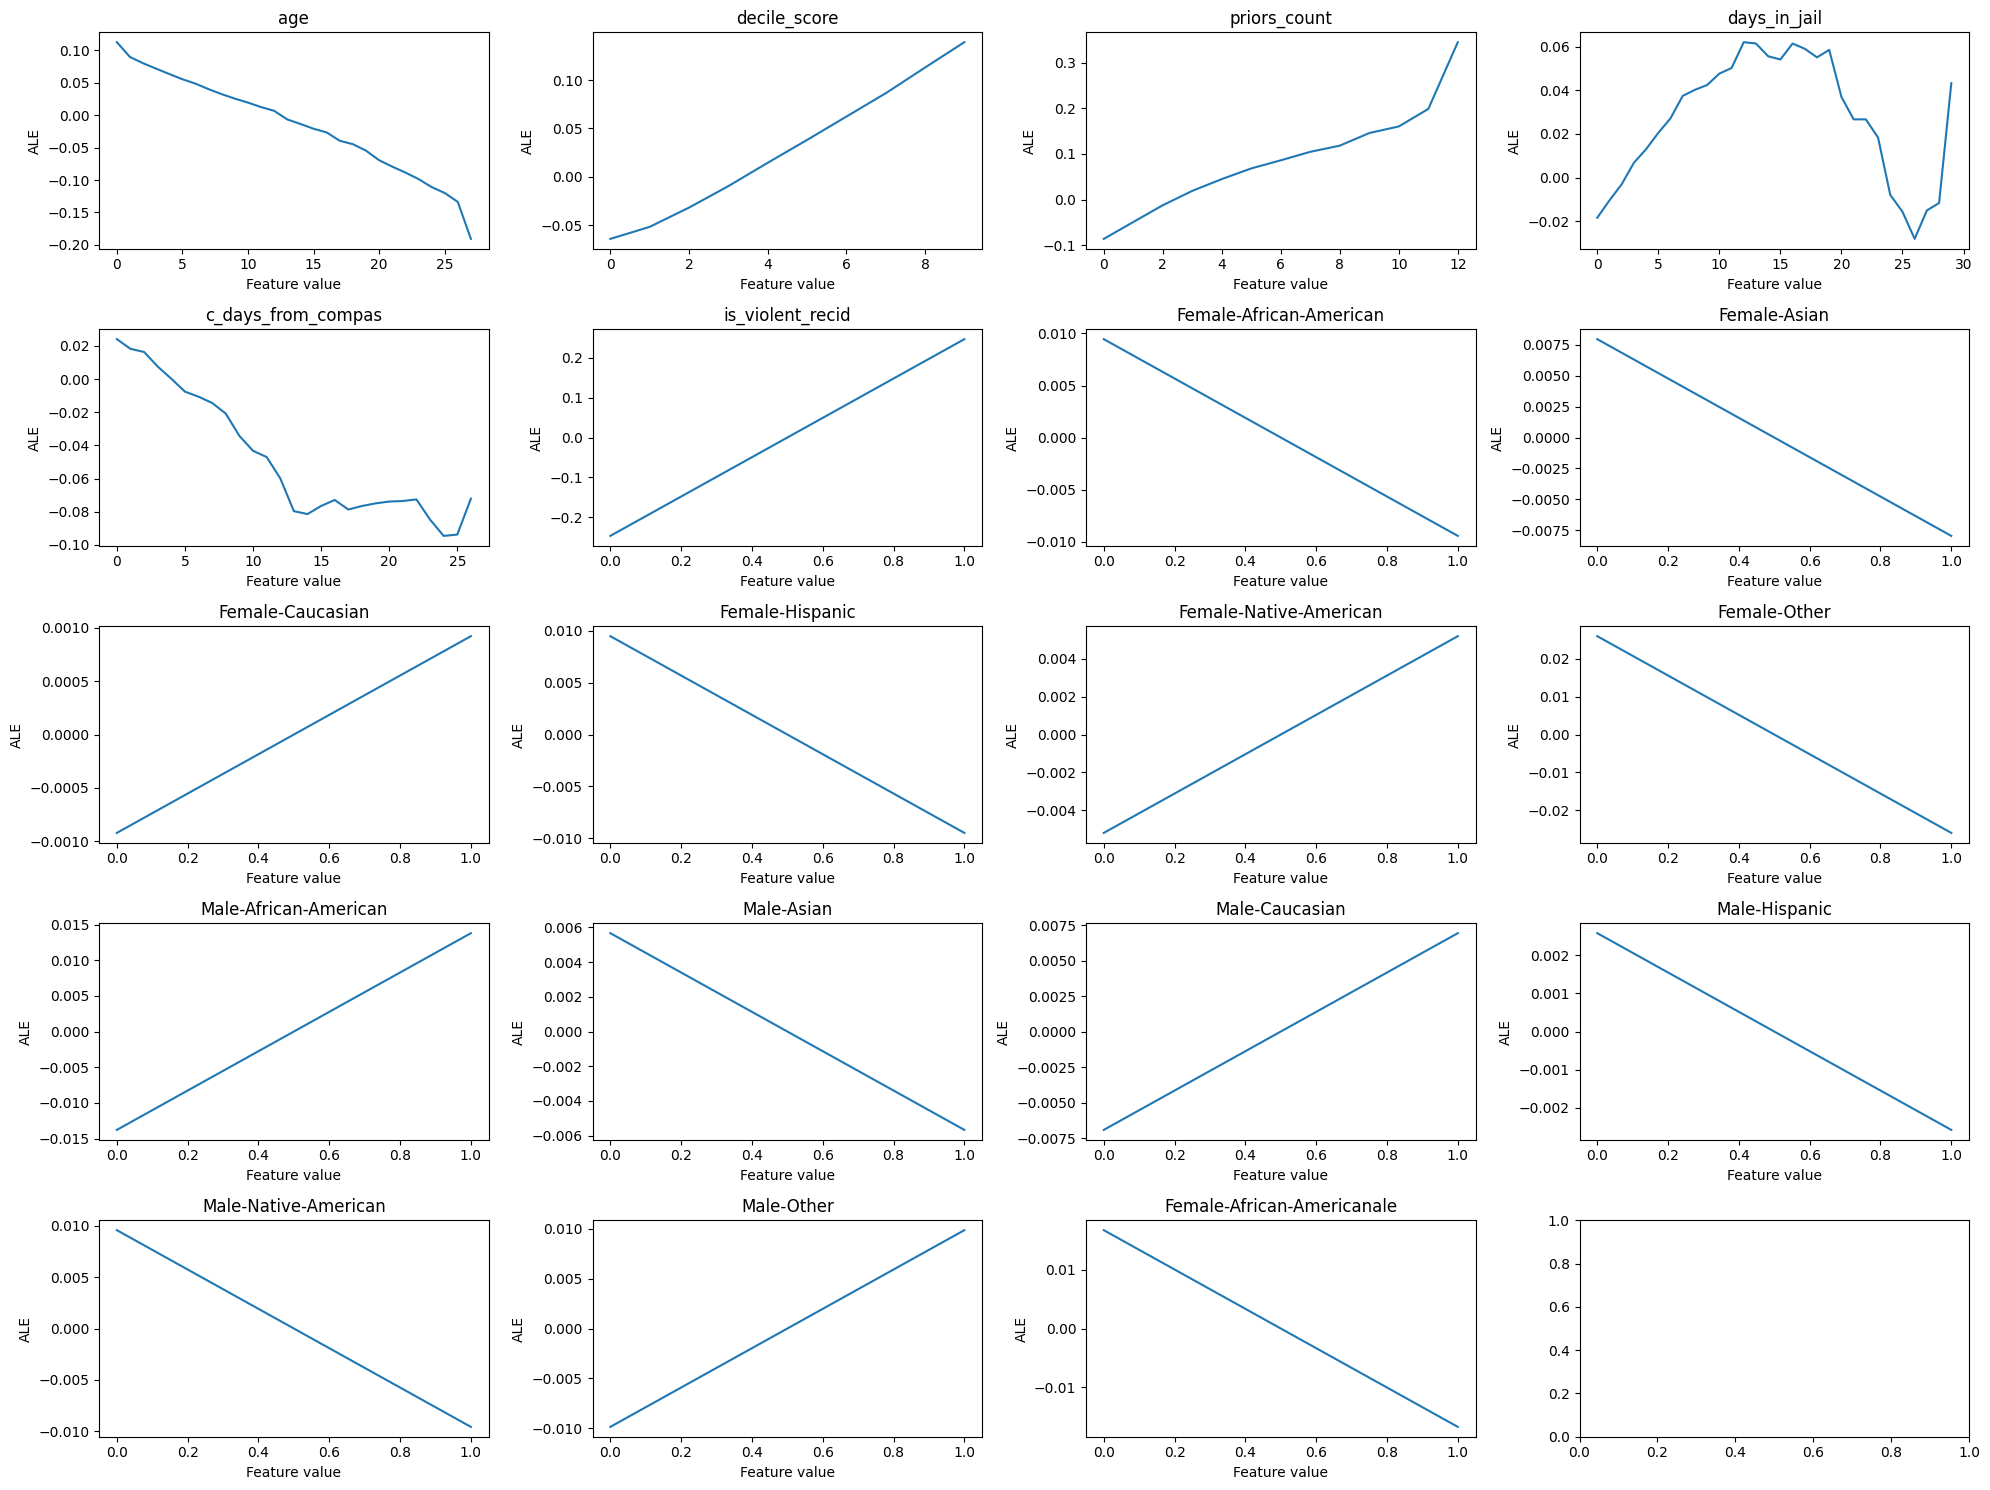

In [88]:
from alibi.explainers import ALE
import matplotlib.pyplot as plt
X_test = X_test.astype(np.float32)

ale = ALE(model.predict, feature_names=X.columns.tolist())

ale_exp = ale.explain(X_test.values)

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
for i, axi in enumerate(ax.flat):
    if i < len(X.columns):
        axi.plot(ale_exp.ale_values[i])
        axi.set_title(X_test.columns[i])
        axi.set_xlabel('Feature value')
        axi.set_ylabel('ALE')
plt.tight_layout()
plt.show()


In [89]:
ale_scores = ale_exp.ale_values

# Print the ALE scores for each feature in the test data
for i, feature_name in enumerate(X.columns):
    print(f"ALE scores for feature '{feature_name}': {ale_scores[i]}")

ALE scores for feature 'age': [[ 0.11274606]
 [ 0.08989545]
 [ 0.08022153]
 [ 0.07181498]
 [ 0.06356683]
 [ 0.05553099]
 [ 0.04875715]
 [ 0.04020984]
 [ 0.03247156]
 [ 0.02561383]
 [ 0.01950203]
 [ 0.0125718 ]
 [ 0.00673614]
 [-0.00650314]
 [-0.01346731]
 [-0.02083133]
 [-0.02652904]
 [-0.03938138]
 [-0.04466914]
 [-0.05464531]
 [-0.06940963]
 [-0.07929917]
 [-0.08842018]
 [-0.0984159 ]
 [-0.11078807]
 [-0.11997327]
 [-0.13372016]
 [-0.1908185 ]]
ALE scores for feature 'decile_score': [[-0.06400627]
 [-0.05159334]
 [-0.0317051 ]
 [-0.00953363]
 [ 0.01456951]
 [ 0.03815803]
 [ 0.06226683]
 [ 0.08638856]
 [ 0.11291406]
 [ 0.13914317]]
ALE scores for feature 'priors_count': [[-0.08640386]
 [-0.04937799]
 [-0.01248342]
 [ 0.01903536]
 [ 0.04490675]
 [ 0.06832734]
 [ 0.08616152]
 [ 0.10477248]
 [ 0.11834821]
 [ 0.14605594]
 [ 0.16050754]
 [ 0.1989578 ]
 [ 0.345538  ]]
ALE scores for feature 'days_in_jail': [[-0.01847315]
 [-0.0104991 ]
 [-0.00309586]
 [ 0.00677016]
 [ 0.0130118 ]
 [ 0.02051